# Exploratory Data Analysis (EDA) Template

### 1. Importació de Biblioteques

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
!pip install sweetviz
import sweetviz as sv

### Carregar el dataset

In [230]:
df = pd.read_csv('/Users/nicolakorff/Documents/Data Analysis/ML/bank_dataset.CSV')

### Mostra les primeres files del dataset

In [233]:
# Sin limites de visualización de columnas
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Informació general del dataset

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [234]:
# info más concreta
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (11162, 17)
Nombre columnas: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


### Descripció estadística del dataset

In [235]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Histograma de cada variable numèrica

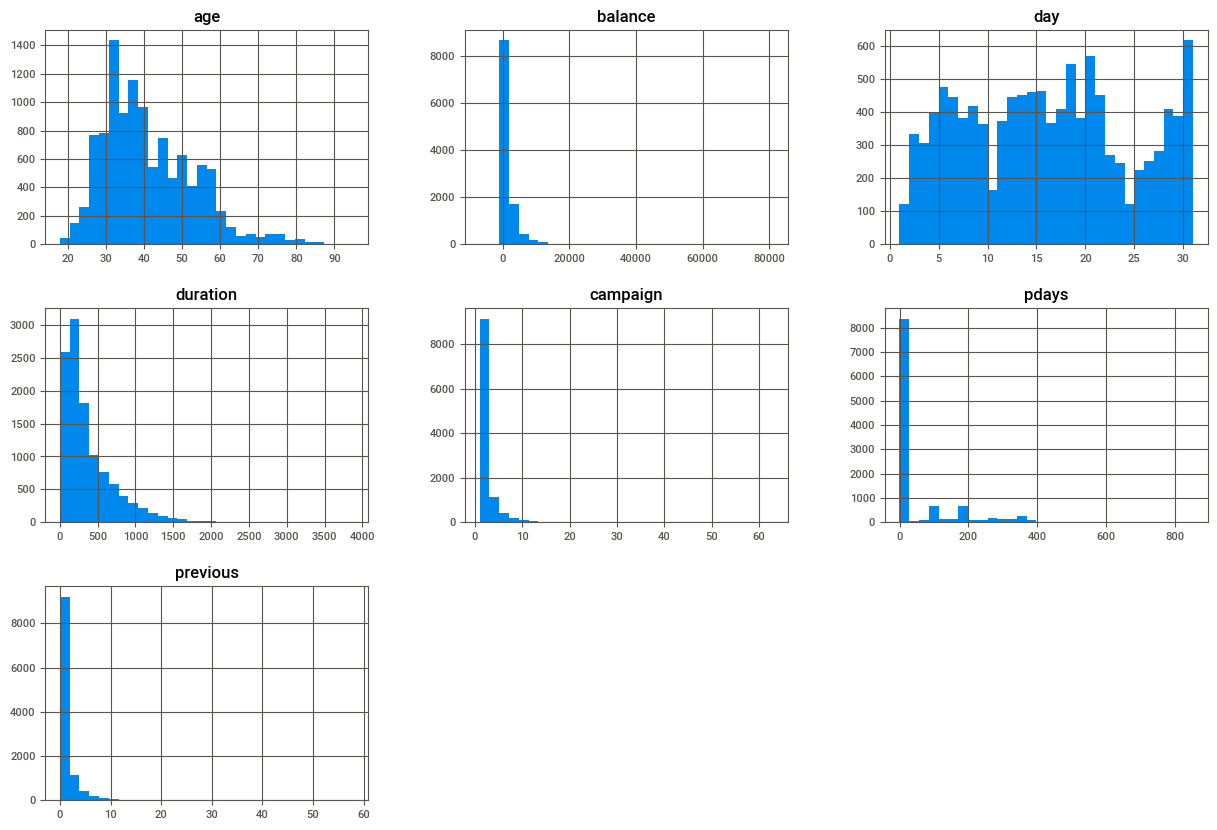

In [236]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

### Comptar els valors de cada variable categòrica

In [237]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

### Visualització en columnes de cada variable categòrica

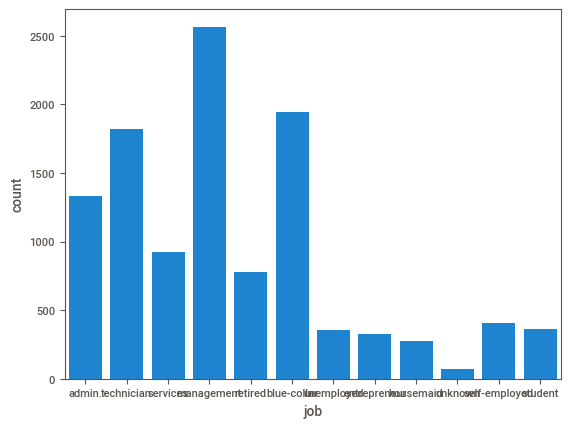

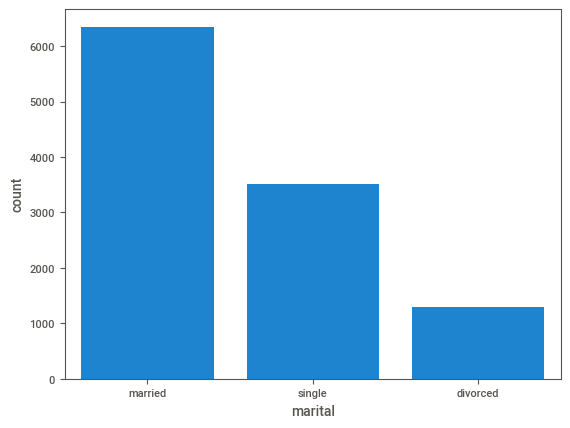

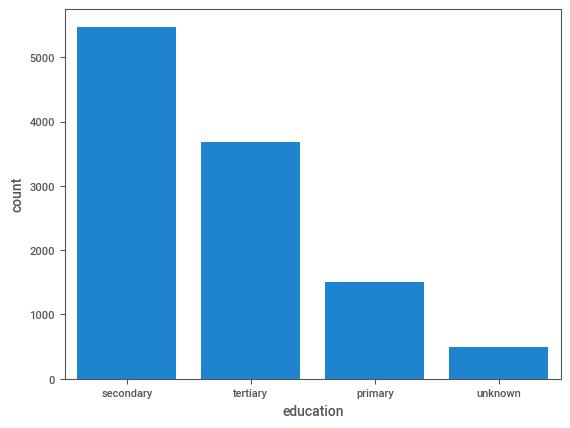

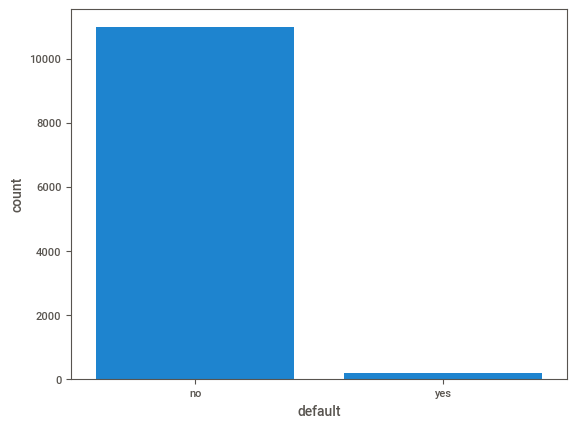

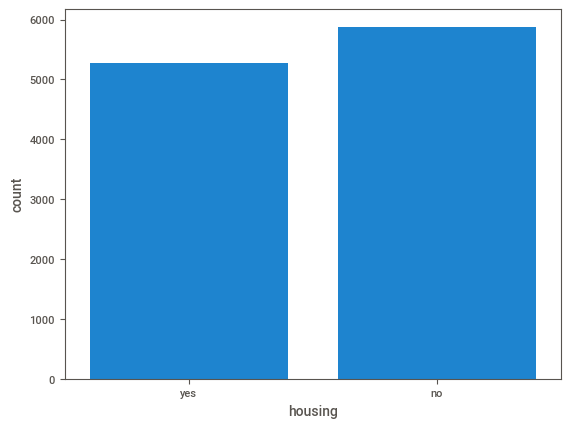

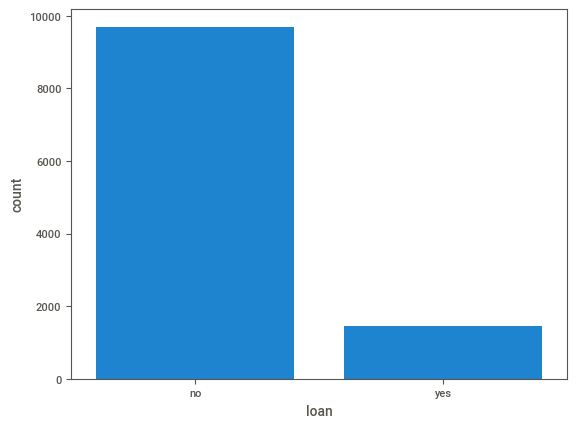

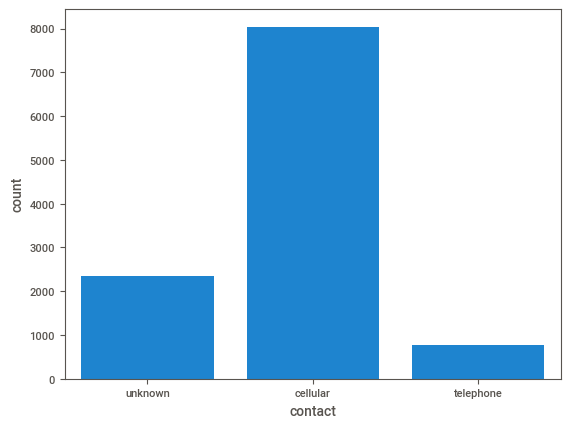

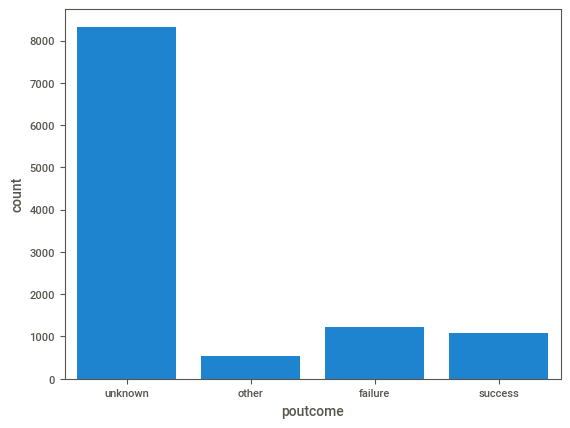

In [171]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for column in categorical_columns:
    sns.countplot(x=df[column])
    plt.show()

### Visualització de valors nuls

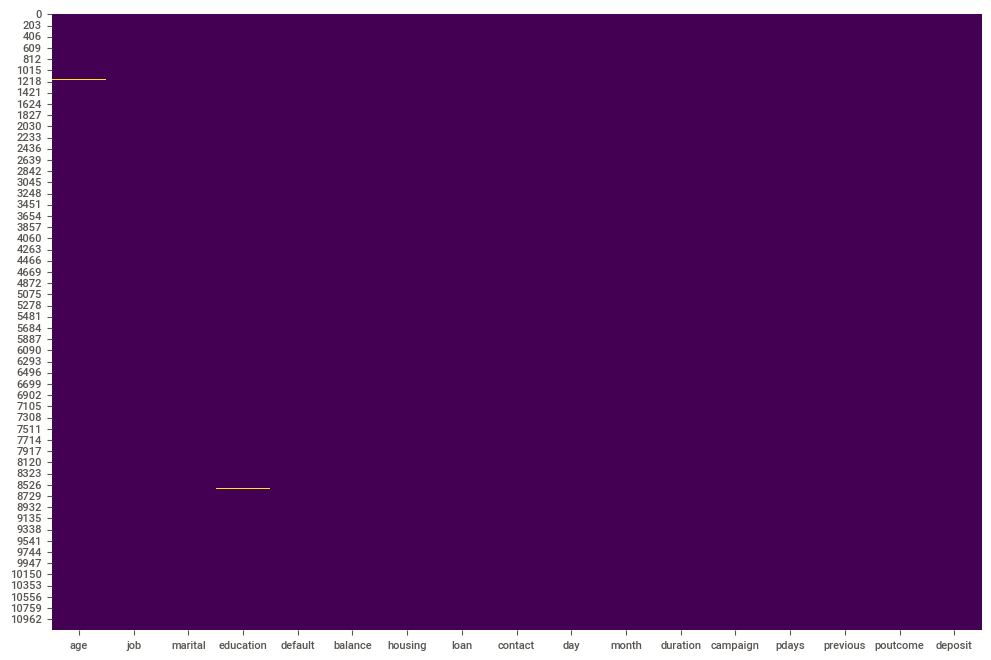

In [238]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

### Comptar valors nuls per columna

In [173]:
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### Tractament de valors nuls

In [239]:
cat_features = [column for column in df.columns if df[column].dtype=='O']
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [240]:
num_features = [column for column in df.columns if df[column].dtype!='O']
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [241]:
for feature in cat_features:
    print(f"La variable {feature.upper()} tiene categorias: {df[feature].nunique()}\
    \n{df[feature].value_counts()}\
    \n \n------------------------\n")

La variable JOB tiene categorias: 12    
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64    
 
------------------------

La variable MARITAL tiene categorias: 3    
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64    
 
------------------------

La variable EDUCATION tiene categorias: 4    
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64    
 
------------------------

La variable DEFAULT tiene categorias: 2    
default
no     10994
yes      168
Name: count, dtype: int64    
 
------------------------

La variable HOUSING tiene categorias: 2    
housing
no     5881
yes    5281
Name: count, dtype: int64    
 
------------------------

La variable LOAN

In [242]:
df.isnull().mean().sort_values(ascending=False)

age          0.000896
education    0.000627
marital      0.000448
month        0.000000
poutcome     0.000000
previous     0.000000
pdays        0.000000
campaign     0.000000
duration     0.000000
contact      0.000000
day          0.000000
job          0.000000
loan         0.000000
housing      0.000000
balance      0.000000
default      0.000000
deposit      0.000000
dtype: float64

In [243]:
df.dropna(subset=['age'], inplace=True)
df= df.fillna({'education':'unknown', 'marital':'unknown'})
df.isnull().mean().sort_values(ascending=False)

age          0.0
day          0.0
poutcome     0.0
previous     0.0
pdays        0.0
campaign     0.0
duration     0.0
month        0.0
contact      0.0
job          0.0
loan         0.0
housing      0.0
balance      0.0
default      0.0
education    0.0
marital      0.0
deposit      0.0
dtype: float64

### Tractament d'outliners

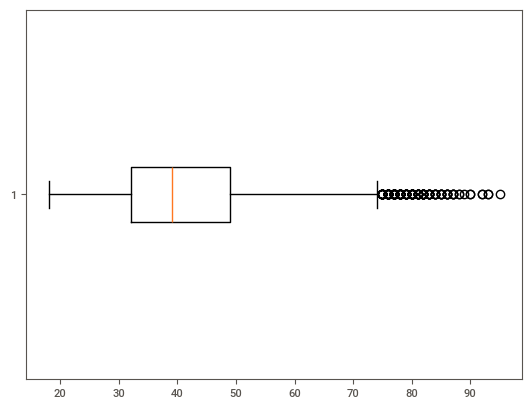

In [244]:
# exemple de procés amb una categoria (age)
plt.boxplot(df['age'], vert=False)
plt.show()

In [245]:
Q1 = df['age'].quantile(0.25)
print('Firs Quantile', Q1)

Q3 = df['age'].quantile(0.75)
print('Third Quantile', Q3)

IQR = Q3 - Q1
print('Interquantile Range', IQR)

mediana = df['age'].median()
print('mediana', mediana)

valor_min = df['age'].min()
print('valor min', valor_min)

valor_max = df['age'].max()
print('valor max', valor_max)

Firs Quantile 32.0
Third Quantile 49.0
Interquantile Range 17.0
mediana 39.0
valor min 18.0
valor max 95.0


In [246]:
BI_calculado = (Q1 - 1.5 + IQR)
print('BS_calculado \n', BI_calculado)

BS_calculado = (Q3 + 1.5 + IQR)
print('BS_calculado \n', BS_calculado)

BS_calculado 
 47.5
BS_calculado 
 67.5


In [247]:
ubicacion_outliers = (df['age'] < BI_calculado) | (df['age'] > BS_calculado)
print('\n ubicación de outliers \n', ubicacion_outliers)


 ubicación de outliers 
 0        False
1        False
2         True
3        False
4        False
         ...  
11157     True
11158     True
11159     True
11160     True
11161     True
Name: age, Length: 11152, dtype: bool


In [249]:
outliers = df[ubicacion_outliers]
print('\n Lista de outliers \n', outliers)


 Lista de outliers 
         age          job  marital  education default  balance housing loan  \
2      41.0   technician  married  secondary      no     1270     yes   no   
5      42.0   management   single   tertiary      no        0     yes  yes   
8      37.0   technician  married  secondary      no        1     yes   no   
9      28.0     services   single  secondary      no     5090     yes   no   
10     38.0       admin.   single  secondary      no      100     yes   no   
...     ...          ...      ...        ...     ...      ...     ...  ...   
11157  33.0  blue-collar   single    primary      no        1     yes   no   
11158  39.0     services  married  secondary      no      733      no   no   
11159  32.0   technician   single  secondary      no       29      no   no   
11160  43.0   technician  married  secondary      no        0      no  yes   
11161  34.0   technician  married  secondary      no        0      no   no   

        contact  day month  duration  cam

In [248]:
# Tractament del conjunt d'outliers
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for column in numeric_columns:
    df_outliers = remove_outliers_iqr(df, column)
print(df_outliers)

        age          job  marital  education default  balance housing loan  \
0      59.0       admin.  married  secondary      no     2343     yes   no   
1      56.0       admin.  married  secondary      no       45      no   no   
2      41.0   technician  married  secondary      no     1270     yes   no   
3      55.0     services  married  secondary      no     2476     yes   no   
4      54.0       admin.  married   tertiary      no      184      no   no   
...     ...          ...      ...        ...     ...      ...     ...  ...   
11156  34.0  blue-collar   single  secondary      no      -72     yes   no   
11157  33.0  blue-collar   single    primary      no        1     yes   no   
11158  39.0     services  married  secondary      no      733      no   no   
11159  32.0   technician   single  secondary      no       29      no   no   
11161  34.0   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous

### Desvalance de classes

In [302]:
print(df['default'].value_counts(normalize=True) * 100)

default
no     98.492868
yes     1.507132
Name: proportion, dtype: float64


In [307]:
from sklearn.utils import resample

df_majority = df[df['default'] == 'no'] 
df_minority = df[df['default'] == 'yes']  
df_majority_downsampled = resample(df_majority, 
                                   replace=False,  
                                   n_samples=len(df_minority), 
                                   random_state=42) 
df_balanced = pd.concat([df_majority_downsampled, df_minority])
print(df_balanced['default'].value_counts())

default
no     168
yes    168
Name: count, dtype: int64


### Verificar distribució de la variable objectiu 'deposit'

In [251]:
print(df['deposit'].value_counts(normalize=True) * 100)

deposit
no     52.60043
yes    47.39957
Name: proportion, dtype: float64


### Sueldo per feines

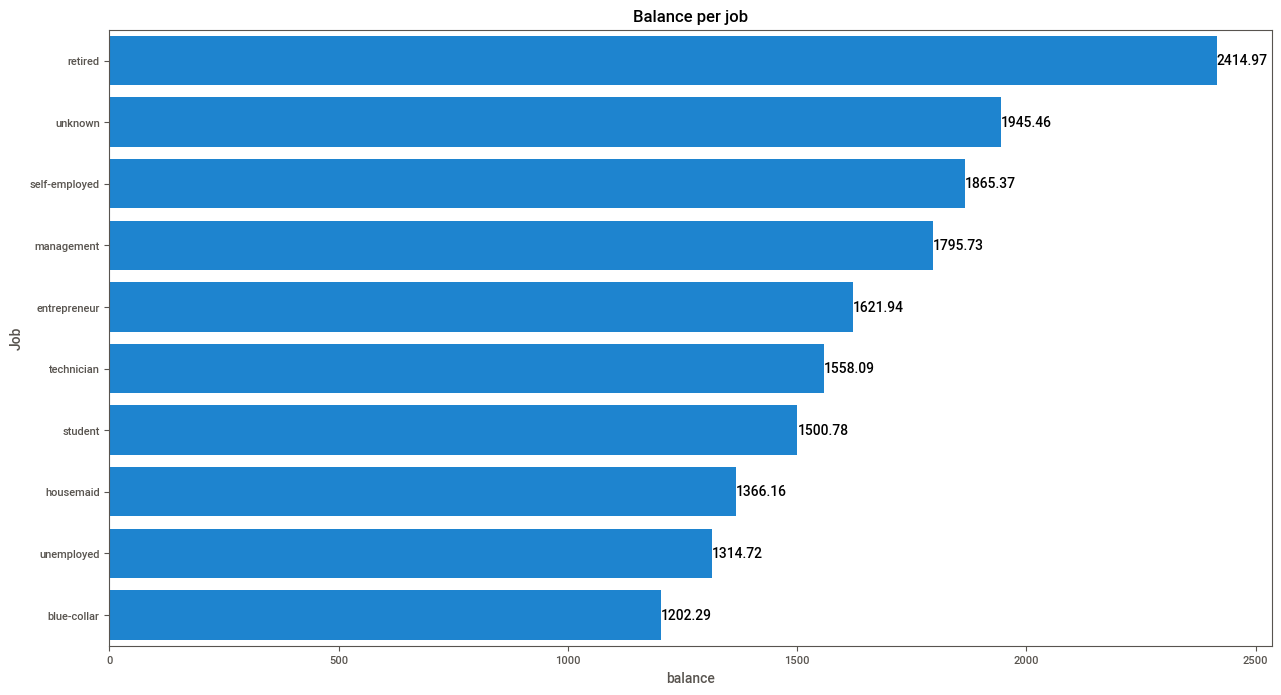

In [317]:
%matplotlib inline
plt.figure(figsize=(15,8))

ax = sns.barplot(data=df.groupby('job')['balance'].mean().nlargest(10).reset_index(),
                 x='balance',
                 y = 'job')

ax.set(xlabel='balance', ylabel='Job', title = 'Balance per job')
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

In [327]:
df.groupby('job')['balance'].mean().nlargest(10).reset_index()

,job,balance
0,retired,2414.970399
1,unknown,1945.457143
2,self-employed,1865.372840
3,management,1795.734192
4,entrepreneur,1621.942073
5,technician,1558.087363
6,student,1500.783333
7,housemaid,1366.160584
8,unemployed,1314.719888
9,blue-collar,1202.285935


### Les edats per tipus de feines

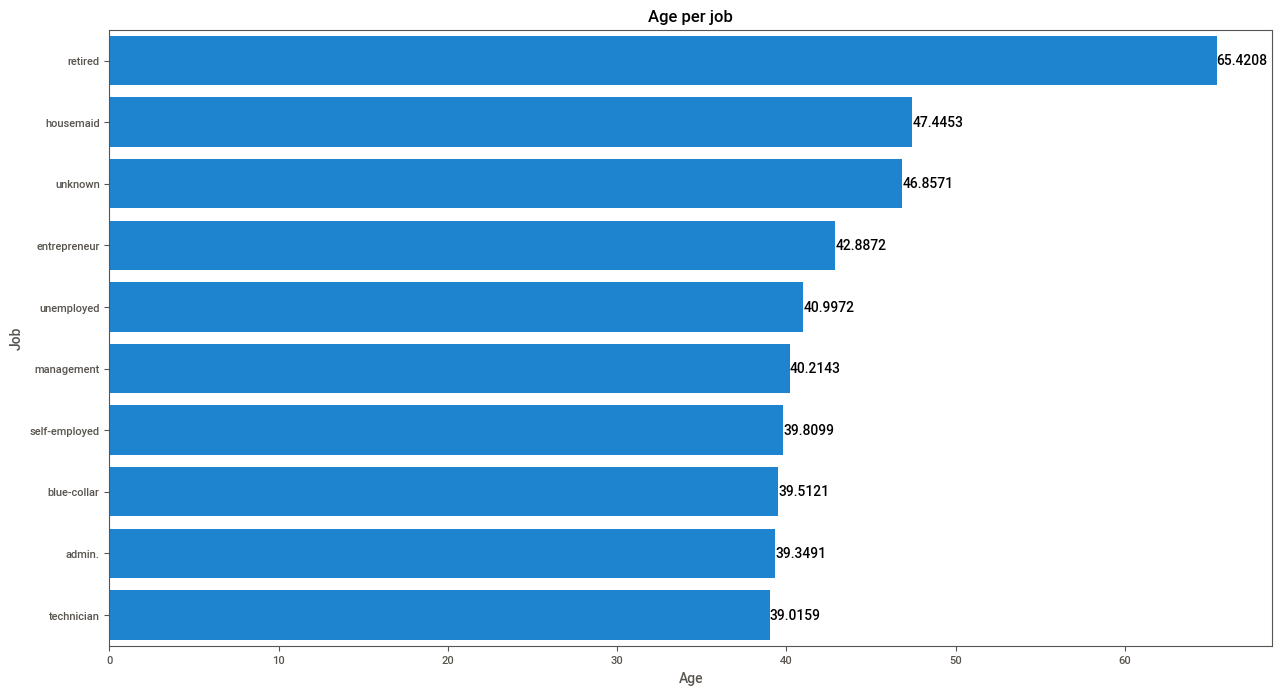

In [323]:
%matplotlib inline
plt.figure(figsize=(15,8))

ax = sns.barplot(data=df.groupby('job')['age'].mean().nlargest(10).reset_index(),
                 x='age',
                 y = 'job')

ax.set(xlabel='Age', ylabel='Job', title = 'Age per job')
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

In [321]:
df.groupby('job')['age'].mean().nlargest(10).reset_index() 

,job,age
0,retired,65.420849
1,housemaid,47.445255
2,unknown,46.857143
3,entrepreneur,42.887195
4,unemployed,40.997199
5,management,40.214286
6,self-employed,39.809877
7,blue-collar,39.512107
8,admin.,39.349099
9,technician,39.015934


### Quines feines amb quins saldos tenen diposits y quines no

In [260]:
df['deposit'].unique()

array(['yes', 'no'], dtype=object)

In [266]:
deposits = ['yes', 'no']

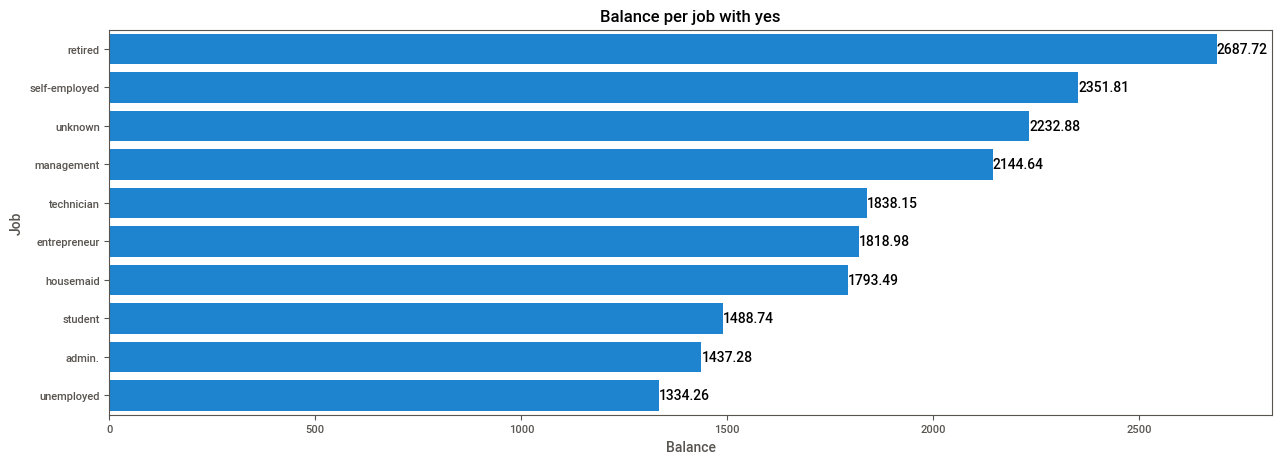

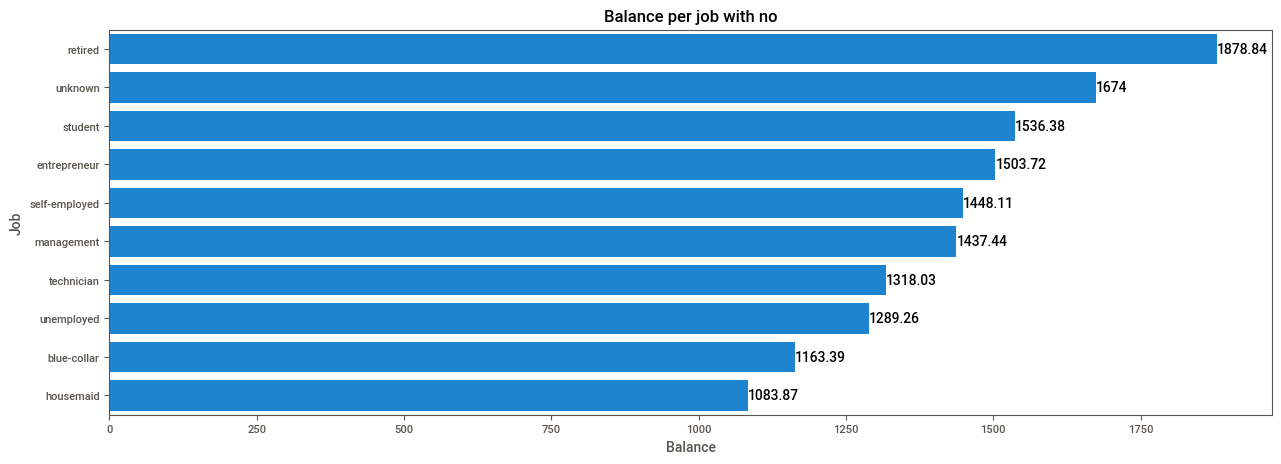

In [333]:
for deposit in deposits:
    
    plt.figure(figsize=(15,5))
    ax = sns.barplot(
                    x = df[df['deposit']==deposit].groupby('job')['balance'].mean().nlargest(10).values,
                    y = df[df['deposit']==deposit].groupby('job')['balance'].mean().nlargest(10).index
    )
    ax.set(xlabel='Balance', ylabel='Job', title = f'Balance per job with {deposit}')
    plt.bar_label(ax.containers[0], size=10)
    plt.tight_layout
    plt.show()

### Diferencia de diposit entre casats i solters

In [271]:
df['marital'].value_counts()

marital
married     6343
single      3514
divorced    1290
unknown        5
Name: count, dtype: int64

In [273]:
df = df[df['marital']!='unknown']
df['marital'].value_counts()

marital
married     6343
single      3514
divorced    1290
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='age'>

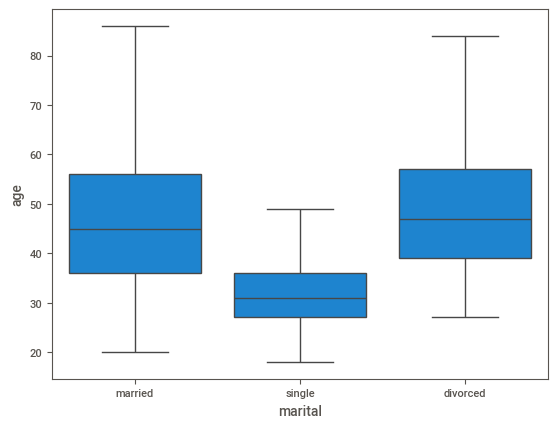

In [278]:
uno_df = df[df['deposit']=='yes']

sns.boxplot(data=uno_df,
           x='marital',
           y='age',
           showfliers=False)

### EDA automàtic amb Sweetviz

In [301]:
report = sv.analyze(df)
report.show_html('EDA_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Conclusions

En analitzar la base de dades s'han pogut diferenciar els descriptius bàsics i separar-ne les característiques rellevants. S'han detectat i corregit els valors nuls i els outliers. S'han trobat una classe en desbalança (default) que també s'ha gestionat.

S'ha pogut observar que la gent jove té més tendència a estar soltera, tots dos casos porten a menys adquisicions de dipòsits. Però això pot ser perquè s'ha contactat amb més gent casada que soltera o divorciada.  D'altra banda, les professions relacionades amb les edats mantenen una relació equitativa en l'adquisició de dipòsits, sent les persones retirades de gent gran i les mestresses de casa d'edat avançada els targets més positius. Aquí els resultats sorprenen, perquè de les persones enquestades, les menys participants eren precisament les que més han comprat tant en edat com en professions. La majoria de persones enquestades tenen estudis de secundària. Les persones tenen, en general, menys propietats immobiliàries, però amb una diferència mínima. Així mateix, la majoria d'enquestats no tenen crèdits bancaris ni deutes pendents. També es pot comprovar que com més gran és el sou, més possibilitats hi ha que s'adquireixin dipòsits.

La campanya té més resposta durant el mes de maig amb diferència sobre la resta. L'outcome és en general més negatiu que positiu, encara que hi ha molts valors desconeguts, cosa que requeriria dades més correctes per a la propera campanya.  La majoria de contactes aconseguits han estat per via telèfon mòbil.